Añadimos librerías necesarias para la ejecución del código

In [6]:
import mne
from mne import Epochs, find_events, concatenate_epochs
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np


from analysis_tools import load_raw

En primer lugar, se debe cargar el objeto RAW a partir del CSV en el que se recopila la información de los canales BCI.
En este caso, los canales desde los que se recopila información son 6 (O1, P3, Oz, Pz, P4, O2).
A continuación, aplicamos un filtro de muesca de 50Hz para así eliminar el ruido de línea eléctrica en Europa

Creating RawArray with float64 data, n_channels=7, n_times=338150
    Range : 0 ... 338149 =      0.000 ...  1352.596 secs
Ready.
7
7
Creating RawArray with float64 data, n_channels=7, n_times=338170
    Range : 0 ... 338169 =      0.000 ...  1352.676 secs
Ready.
7
7
Creating RawArray with float64 data, n_channels=7, n_times=482810
    Range : 0 ... 482809 =      0.000 ...  1931.236 secs
Ready.
7
7
Creating RawArray with float64 data, n_channels=7, n_times=253590
    Range : 0 ... 253589 =      0.000 ...  1014.356 secs
Ready.
7
7
Creating RawArray with float64 data, n_channels=7, n_times=398180
    Range : 0 ... 398179 =      0.000 ...  1592.716 secs
Ready.
7
7
Creating RawArray with float64 data, n_channels=7, n_times=477650
    Range : 0 ... 477649 =      0.000 ...  1910.596 secs
Ready.
7
7
<RawArray | 7 x 338150 (1352.6 s), ~18.1 MB, data loaded>
Frecuencia de muestreo: 250.0 Hz
Tamaño de la matriz de datos: (7, 338150)

<Info | 8 non-empty values
 bads: []
 ch_names: O1, P3, Oz, Pz

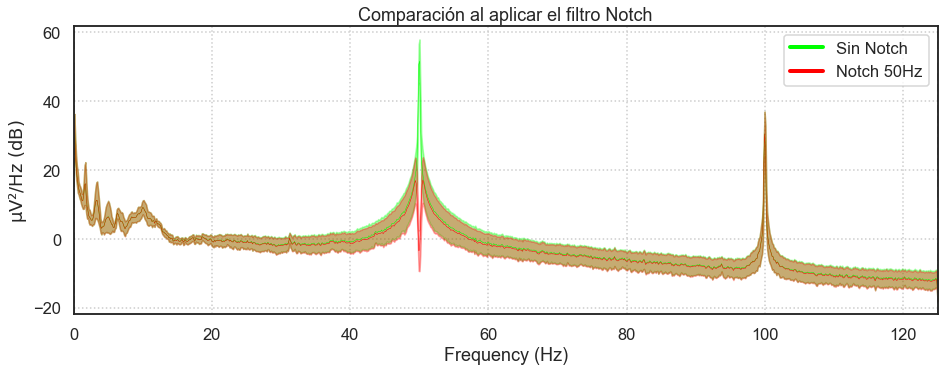

In [7]:
sampling_rate = 250
filename = 'trained_model.sav'

clf = None

#Datasets Sujeto 1
dataset1 = "experiments/datasetsRuben/trainFraseHolamellamoRuben2/records/record_23-07-2021.csv"
dataset2 = "experiments/datasetsRuben/trainFraseHolamellamoRubenysoydemurcia/records/record_20-07-2021.csv"
dataset3 = "experiments/datasetsRuben/trainFraseHolamellamoRuben40letras/records/record_24-07-2021.csv"

datasetRegion1 = "experiments/datasetsRuben/regionesTrainFraseHolamellamoRubenysoydemurcia/records/record_13-08-2021.csv"
datasetRegion2 = "experiments/datasetsRuben/regionesTrainFraseHolamellamo28/records/record_19-08-2021.csv"
datasetRegion3 = "experiments/datasetsRuben/regionesTrainFraseHolamellamo40/records/record_19-08-2021.csv"

#Datasets Sujeto 2
#datasetRCCristobal = "experiments/datasetsCristobal/trainCristobalRC21/records/record_17-08-2021.csv"
datasetRCCristobal = "experiments/datasetsCristobal/trainFrase21FC/records/record_25-08-2021.csv"
datasetRCCristobal2 = "experiments/datasetsCristobal/trainCristobalRC32/records/record_17-08-2021.csv"
datasetRCCristobal3 = "experiments/datasetsCristobal/trainCristobalRCMellamo40/records/record_19-08-2021.csv"

datasetRegionCristobal = "experiments/datasetsCristobal/trainCristobalRegion21/records/record_17-08-2021.csv"
datasetRegionCristobal2 = "experiments/datasetsCristobal/trainCristobalRegion32/records/record_17-08-2021.csv"
datasetRegionCristobal3 = "experiments/datasetsCristobal/trainCristobalRegion40/records/record_20-08-2021.csv"


subject = 0
session = 0
ch_names = {}

#Cargar valores de los canales en cada época

# Sujeto 1
raw1 = load_raw(dataset1, sfreq=sampling_rate, stim_ind=8, replace_ch_names=None, ch_ind=[0, 1, 2, 3, 4, 5])
raw2 = load_raw(dataset2, sfreq=sampling_rate, stim_ind=8, replace_ch_names=None, ch_ind=[0, 1, 2, 3, 4, 5])
raw3 = load_raw(dataset3, sfreq=sampling_rate, stim_ind=8, replace_ch_names=None, ch_ind=[0, 1, 2, 3, 4, 5])

# Sujeto 2
raw = load_raw(datasetRCCristobal, sfreq=sampling_rate, stim_ind=8, replace_ch_names=None, ch_ind=[0, 1, 2, 3, 4, 5])
raw0 = load_raw(datasetRCCristobal2, sfreq=sampling_rate, stim_ind=8, replace_ch_names=None, ch_ind=[0, 1, 2, 3, 4, 5])
raw01 = load_raw(datasetRCCristobal3, sfreq=sampling_rate, stim_ind=8, replace_ch_names=None, ch_ind=[0, 1, 2, 3, 4, 5])

print(raw1)
print('Frecuencia de muestreo:', raw1.info['sfreq'], 'Hz')
print('Tamaño de la matriz de datos: {}\n'.format(raw1.get_data().shape))

print(raw1.info)

#Guardar nombres de cada uno de los canales utilizados
for i, chn in enumerate(raw1.ch_names):
    ch_names[chn] = i


#Aplicación de filtro de muesca de 50Hz para eliminar ruido de línea eléctrica en Europa
#Sujeto 1
raw_notch1 = raw1.copy().notch_filter([50.0])
raw_notch2 = raw2.copy().notch_filter([50.0])
raw_notch3 = raw3.copy().notch_filter([50.0])
#Sujeto 2
raw_notch = raw.copy().notch_filter([50.0])
raw_notch0 = raw0.copy().notch_filter([50.0])
raw_notch01 = raw01.copy().notch_filter([50.0])

custom_lines = [Line2D([0], [0], color=(0, 1, 0), lw=4),
                Line2D([0], [0], color=(1, 0, 0), lw=4)]

# Comparacion de filtro notch (dataset Sujeto 1)
fig, ax = plt.subplots(figsize = (15, 5))
raw1.plot_psd(ax=ax, color=(0, 1, 0), average=True, show=False)
raw_notch1.plot_psd(ax=ax, color=(1, 0, 0), average=True, show=False)
ax.set_title('Comparación al aplicar el filtro Notch')
plt.legend(custom_lines, ['Sin Notch', 'Notch 50Hz'])


Ahora, aplicamos un filtro de passo de banda de 1 a 17Hz para eliminar ruido de la señal obtenida.
Después de esto, al tener una frecuencia de 250 Hz, vamos a reducir el número de muestras por segundo a 50 para que el número de vectores sea más manejable.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 17 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 17.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 17 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 17.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 17 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 17.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-pa

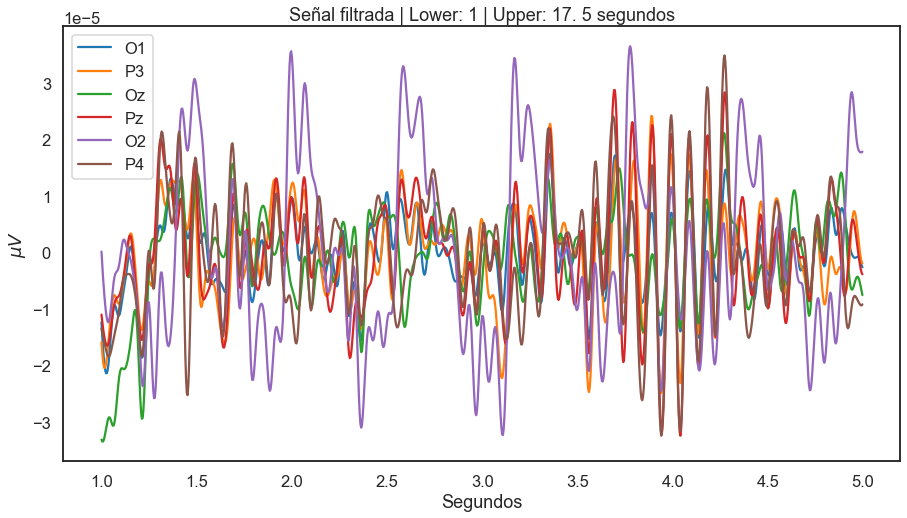

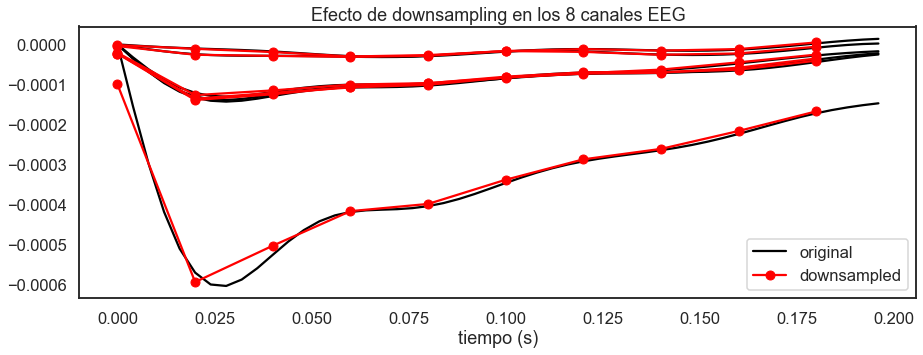

In [8]:
#Aplicación de filtro de paso de banda de 1Hz a 17Hz
lower = 1
upper = 17
# Sujeto 1
raw_notch_and_filter1 = raw_notch1.copy().filter(lower, upper, method='iir')
raw_notch_and_filter2 = raw_notch2.copy().filter(lower, upper, method='iir')
raw_notch_and_filter3 = raw_notch3.copy().filter(lower, upper, method='iir')
# Sujeto 2
raw_notch_and_filter = raw_notch.copy().filter(lower, upper, method='iir')
raw_notch_and_filter0 = raw_notch0.copy().filter(lower, upper, method='iir')
raw_notch_and_filter01 = raw_notch01.copy().filter(lower, upper, method='iir')

# Señal EEG cuando se realiza la aplicacion de filtro de paso de banda
sfreq = raw_notch_and_filter1.info['sfreq']
data_f, times_f = raw_notch_and_filter1[:-1, int(sfreq * 1):int(sfreq * 5)]
fig = plt.subplots(figsize=(15, 8))
plt.plot(times_f, data_f.T)
plt.xlabel('Segundos')
plt.ylabel('$\mu V$')
plt.title('Señal filtrada | Lower: 1 | Upper: 17. 5 segundos')
plt.legend(raw_notch_and_filter1.ch_names[:-1])

#Downsampling de la señal de 250 Hz a 50 Hz (50 muestras por segundo)
# Sujeto 1
raw_notch_and_filter_downsamp1 = raw_notch_and_filter1.copy()
raw_notch_and_filter_downsamp1.resample(50, npad="auto")

raw_notch_and_filter_downsamp2 = raw_notch_and_filter2.copy()
raw_notch_and_filter_downsamp2.resample(50, npad="auto")

raw_notch_and_filter_downsamp3 = raw_notch_and_filter3.copy()
raw_notch_and_filter_downsamp3.resample(50, npad="auto")

# Sujeto 2
raw_notch_and_filter_downsamp = raw_notch_and_filter.copy()
raw_notch_and_filter_downsamp.resample(50, npad="auto")

raw_notch_and_filter_downsamp0 = raw_notch_and_filter0.copy()
raw_notch_and_filter_downsamp0.resample(50, npad="auto")

raw_notch_and_filter_downsamp01 = raw_notch_and_filter01.copy()
raw_notch_and_filter_downsamp01.resample(50, npad="auto")

# Señal EEG después de realizar downsampling en un factor de 5
legend_elements = [Line2D([0], [0], color='black', label='original'),
                   Line2D([0], [0], marker='o', color='red', label='downsampled')
                   ]

plt.figure(figsize=(15, 5))

n_samples_to_plot = int(0.2 * raw_notch_and_filter1.info['sfreq'])  # plot 0.5 seconds of data
data, times = raw_notch_and_filter1[0:-1, :n_samples_to_plot]
plt.plot(times,data.T, color='black')

n_samples_to_plot = int(0.2 * raw_notch_and_filter_downsamp1.info['sfreq'])  # plot 0.5 seconds of data
data, times = raw_notch_and_filter_downsamp1[0:-1, :n_samples_to_plot]
plt.plot(times,data.T,'-o', color='red')

plt.xlabel('tiempo (s)')
plt.legend(handles=legend_elements, loc='best')
plt.title('Efecto de downsampling en los 8 canales EEG')
plt.show()

Aplicamos filtro de ICA.
Seguidamente, a partir del raw obtenido al aplicar todos los filtros, obtenemos los eventos que contiene.
Tras obtener todos los eventos del raw, pasamos a obtener los epocas en un rango de 0.2 - 0.7 seg después de que el estímulo ocurra.

Fitting ICA to data using 6 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting all PCA components: 6 components
Fitting ICA took 0.2s.
Transforming to ICA space (6 components)
Zeroing out 1 ICA component
Fitting ICA to data using 6 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting all PCA components: 6 components
Fitting ICA took 0.2s.
Transforming to ICA space (6 components)
Zeroing out 1 ICA component
Fitting ICA to data using 6 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting all PCA components: 6 components
Fitting ICA took 0.3s.
Transforming to ICA space (6 components)
Zeroing out 1 ICA component
Fitting ICA to data using 6 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting all PCA components: 6 components
Fitting ICA took 0.1s.
Transforming to ICA space (6 components)
Zeroing 

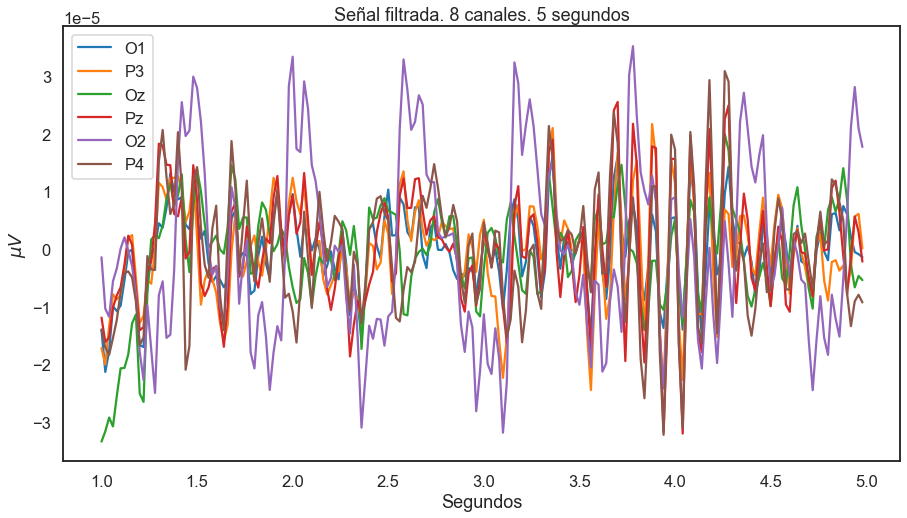

In [9]:
#Uso de métodos ICA para limpiar el ruido aún más

# Sujeto 1
ica = mne.preprocessing.ICA(random_state=97)
ica.fit(raw_notch_and_filter_downsamp1)
raw_notch_and_filter_ica1 = raw_notch_and_filter_downsamp1.copy()
raw_notch_and_filter_ica1.load_data()
ica.exclude = [0]
ica.apply(raw_notch_and_filter_ica1)

ica = mne.preprocessing.ICA(random_state=97)
ica.fit(raw_notch_and_filter_downsamp2)
raw_notch_and_filter_ica2 = raw_notch_and_filter_downsamp2.copy()
raw_notch_and_filter_ica2.load_data()
ica.exclude = [0]
ica.apply(raw_notch_and_filter_ica2)

ica = mne.preprocessing.ICA(random_state=97)
ica.fit(raw_notch_and_filter_downsamp3)
raw_notch_and_filter_ica2 = raw_notch_and_filter_downsamp3.copy()
raw_notch_and_filter_ica2.load_data()
ica.exclude = [0]
ica.apply(raw_notch_and_filter_ica2)

# Sujeto 2
ica = mne.preprocessing.ICA(random_state=97)
ica.fit(raw_notch_and_filter_downsamp)
raw_notch_and_filter_ica = raw_notch_and_filter_downsamp.copy()
raw_notch_and_filter_ica.load_data()
ica.exclude = [0]
ica.apply(raw_notch_and_filter_ica)

ica = mne.preprocessing.ICA(random_state=97)
ica.fit(raw_notch_and_filter_downsamp0)
raw_notch_and_filter_ica0 = raw_notch_and_filter_downsamp0.copy()
raw_notch_and_filter_ica0.load_data()
ica.exclude = [0]
ica.apply(raw_notch_and_filter_ica0)

ica = mne.preprocessing.ICA(random_state=97)
ica.fit(raw_notch_and_filter_downsamp01)
raw_notch_and_filter_ica01 = raw_notch_and_filter_downsamp01.copy()
raw_notch_and_filter_ica01.load_data()
ica.exclude = [0]
ica.apply(raw_notch_and_filter_ica01)

# 5 primeros segundos de señal filtrada
sfreq = raw_notch_and_filter_downsamp1.info['sfreq']
data_f_1, times_f_1 = raw_notch_and_filter_downsamp1[:-1, int(sfreq * 1):int(sfreq * 5)]
fig = plt.subplots(figsize=(15, 8))
plt.plot(times_f_1, data_f_1.T)
plt.xlabel('Segundos')
plt.ylabel('$\mu V$')
plt.title('Señal filtrada. 8 canales. 5 segundos')
plt.legend(raw_notch_and_filter_downsamp1.ch_names[:-1])




#Obtener eventos producidos y epocas en datasets de Sujeto 1

events1 = find_events(raw_notch_and_filter_downsamp1, shortest_event=1)
events2 = find_events(raw_notch_and_filter_downsamp2, shortest_event=1)
events3 = find_events(raw_notch_and_filter_downsamp3, shortest_event=1)


baseline = (0.2, 0.2)
event_id = {'Target': 1, 'NoTarget': 2}
reject = {'eeg': 100e-6}

#A partir de los eventos, obtener las épocas

epochs1 = Epochs(raw_notch_and_filter_downsamp1, events=events1, event_id=event_id, tmin=0.2, tmax=0.7, baseline=baseline ,reject=reject, preload=True)
epochs1.pick_types(eeg=True)

epochs2 = Epochs(raw_notch_and_filter_downsamp2, events=events2, event_id=event_id, tmin=0.2, tmax=0.7, baseline=baseline ,reject=reject, preload=True)
epochs2.pick_types(eeg=True)

epochs3 = Epochs(raw_notch_and_filter_downsamp3, events=events3, event_id=event_id, tmin=0.2, tmax=0.7, baseline=baseline ,reject=reject, preload=True)
epochs3.pick_types(eeg=True)

#Obtener eventos producidos y epocas en datasets de Sujeto 2

#events = find_events(raw_notch_and_filter_downsamp, shortest_event=1)
#events0 = find_events(raw_notch_and_filter_downsamp0, shortest_event=1)
#events01 = find_events(raw_notch_and_filter_downsamp01, shortest_event=1)

baseline = (0.2, 0.2)
event_id = {'Target': 1, 'NoTarget': 2}
reject = {'eeg': 100e-6}

#A partir de los eventos, obtener las épocas

#epochs = Epochs(raw_notch_and_filter_downsamp, events=events, event_id=event_id, tmin=0.2, tmax=0.7, baseline=baseline ,reject=reject, preload=True)
#epochs.pick_types(eeg=True)

#epochs0 = Epochs(raw_notch_and_filter_downsamp0, events=events0, event_id=event_id, tmin=0.2, tmax=0.7, baseline=baseline ,reject=reject, preload=True)
#epochs0.pick_types(eeg=True)

#epochs01 = Epochs(raw_notch_and_filter_downsamp01, events=events01, event_id=event_id, tmin=0.2, tmax=0.7, baseline=baseline ,reject=reject, preload=True)
#epochs01.pick_types(eeg=True)


epochs = concatenate_epochs([epochs1, epochs2, epochs3])
#epochs = concatenate_epochs([epochs, epochs0, epochs01])
print(epochs)

In [10]:

from sklearn.metrics import classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline

import pickle
import random
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate, RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from pyriemann.spatialfilters import Xdawn

from mne.decoding import Vectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


def train_testing_model(epochs):
    global clf

    # Obtener datos y etiquetas de las epocas
    X = epochs.get_data() * 1e6
    y = epochs.events[:, -1]

    ep = []
    et = []
    n = 0
    m = 0
    
    # Eliminar epocas NoTarget para equilibrar numero de Target y NoTarget
    for i in range(len(epochs)):
        if epochs.events[:, -1][m]==2 and n < (len(epochs['NoTarget']) - len(epochs['Target'])): # Numero de NoTargets que son eliminados
            n = n + 1  
        elif epochs.events[:, -1][m]==1:
            et.append(1)
            ep.append(X[m])
        elif epochs.events[:, -1][m]==2:
            ep.append(X[m])
            et.append(2)
        m = m + 1

    # Codigo comentado: en lugar de eliminar los NoTarget desde el principio,
    # elimina cualquier NoTarget hasta alcanzar el numero de eliminaciones deseado
    '''
    noTarget = set()
    for i in range(2627):
        number = random.randint(0, len(epochs)-1)
        while (epochs.events[:, -1][number]!=2 or number in noTarget):
            number = random.randint(0, len(epochs)-1)
        noTarget.add(number)
    
    for i in range(len(epochs)):
        #print(i)
        #number = random.randint(0, len(epochs)-1)
        if i in noTarget:
            n = n + 1
            #epochs.drop(number, verbose=None)
            #epocas.append(epochs[i].get_data())
            #etiquetas.append(2)
        elif epochs.events[:, -1][i]==1:
            et.append(1)
            ep.append(X[i])
            #epocas.append(epochs[m].get_data())
            #etiquetas.append(1)
        elif epochs.events[:, -1][i]==2:
            ep.append(X[i])
            et.append(2)
    '''
    
    epocas = np.array(ep) # Numero de epocas Target y NoTarget equilibrado
    etiquetas = np.array(et)
    
    try:
        clf = pickle.load(open(filename, 'rb')) # En el caso de que exista ya un clasificador entrenado, se importa
    except:
        #clf = make_pipeline(Vectorizer(), LogisticRegression())
        #clf = make_pipeline(Vectorizer(), LDA())
        #clf = make_pipeline(Xdawn(2, classes=[1]), Vectorizer(), LDA())
        clf = make_pipeline(Vectorizer(), RandomForestClassifier())

    xtrain_scaled = []
    xtest_scaled = []

    #X_train, X_test, y_train, y_test = train_test_split(epocas, etiquetas, test_size=0.30, random_state=42)

    sc = StandardScaler()
    preds = np.empty(len(etiquetas))
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    #print(clf.get_params().keys())
    
    param_distribs_rf = {
        #'lineardiscriminantanalysis__solver': ['svd', 'lsqr', 'eigen'], 
        #'lineardiscriminantanalysis__tol': [0.0001,0.0002,0.0003],
        #'lineardiscriminantanalysis__shrinkage': ['auto'],
        #'xdawn__estimator': ['scm', 'lwf']
        
        #'logisticregression__penalty': ['l2'],
        #'logisticregression__tol' : [0.0001,0.0002,0.0003],
        #'logisticregression__max_iter': [100,200,300],
        #'logisticregression__C' :[0.01, 0.1, 1, 10, 100],
        #'logisticregression__intercept_scaling': [1, 2, 3, 4],
        #'logisticregression__solver':['liblinear', 'lbfgs', 'newton-cg']
        #'logisticregression__verbose':[1]

        #'randomforestclassifier__n_estimators': [200, 300, 500, 800, 1200],   
        #'randomforestclassifier__max_depth': [5, 8, 15, 25, 30],
        #'randomforestclassifier__min_samples_split': [15, 20, 25, 30],
        #'randomforestclassifier__min_samples_leaf': [1, 2, 5, 10]
    }
        
    #rnd_rf_search = RandomizedSearchCV(clf, param_distribs_rf,
    #                                cv=cv, scoring='accuracy', random_state=42)

    #Parámetros R/C Sujeto 1
    clf.set_params(randomforestclassifier__n_estimators=1050)
    clf.set_params(randomforestclassifier__max_depth=7)
    clf.set_params(randomforestclassifier__min_samples_split=27)
    clf.set_params(randomforestclassifier__min_samples_leaf=4)

    #Parámetros R/C Sujeto 2
    #clf.set_params(randomforestclassifier__n_estimators=1600)
    #clf.set_params(randomforestclassifier__max_depth=21)
    #clf.set_params(randomforestclassifier__min_samples_split=21)
    #clf.set_params(randomforestclassifier__min_samples_leaf=2)

    #Parámetros Reg Sujeto 1    
    #clf.set_params(lineardiscriminantanalysis__solver='lsqr') 
    #clf.set_params(lineardiscriminantanalysis__tol= 0.0001)
    #clf.set_params(lineardiscriminantanalysis__shrinkage='auto')

    #Parámetros Reg Sujeto 2
    #clf.set_params(randomforestclassifier__n_estimators=1600)
    #clf.set_params(randomforestclassifier__max_depth=31)
    #clf.set_params(randomforestclassifier__min_samples_split=18)
    #clf.set_params(randomforestclassifier__min_samples_leaf=1)
    
    for train, test in cv.split(epocas, etiquetas):
 
        xtrain = epocas[train]
        xtest = epocas[test]
        ytrain = etiquetas[train]
        ytest = etiquetas[test]

        # Estandarizacion de los datos mediante StandardScaler()
        for i in range(len(xtrain)):
            sc.fit(xtrain[i])
        for i in range(len(xtrain)):    
            xtrain_scaled.append(sc.transform(xtrain[i]))
        
        for i in range(len(xtest)):
            xtest_scaled.append(sc.transform(xtest[i]))

        # Codigo comentado: para mostrar la grafica de las epocas Target
        '''
        for ii, ev in enumerate(epochs.iter_evoked(True)):
            if (ev.comment == '1' and ii in test):
                print("################################ Estímulo #{} ################################".format(ii))
                plot_all_evoked(ii, ev)
                plot_occipital_evoked(ii, ev)
                #ev.pick(['eeg'], exclude=['FP1', 'FP2', 'P7', 'P8'])
                #         fig = ev.plot_topomap(times=np.linspace(0.00, 0.1, 10), ch_type='eeg', colorbar=True)
                #fig = ev.plot_topomap(times=[0.05, 0.1, 0.15, 0.2, 0.22, 0.3, 0.4], ch_type='eeg', colorbar=True)
                ev.plot(picks='eeg', spatial_colors=True)
        '''

        xxtrain = np.array(xtrain_scaled)
        xxtest = np.array(xtest_scaled)
        
        # Entrenamiento y evaluacion del modelo
        clf.fit(xxtrain, ytrain)
        preds[test] = clf.predict(xxtest)
        
        # Codigo a ejecutar cuando realizamos busqueda de hiperparametros
        '''
        rnd_rf_search.fit(xxtrain, ytrain)
        model = rnd_rf_search.best_estimator_
        preds[test] = model.predict(xxtest)
        '''
        # En cada ejecución de KFold, limpiar arrays
        xtrain_scaled.clear()
        xtest_scaled.clear()
        
    # Descomentar en caso de busqueda de hiperparametros
    #print(rnd_rf_search.best_params_)

    target_names = ['Target', 'NoTarget']
    
    # Comprobamos los resultados obtenidos en la evaluacion
    report = classification_report(etiquetas, preds, target_names=target_names)
    print(report)

    scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
    
    # Comprobamos los valores obtenidos en cada ejecucion de KFold
    scores = cross_validate(estimator=clf,X=epocas,y=etiquetas,cv=cv, scoring=scoring)
    print(scores)
    
    # Cuando finalice el entrenamiento, exportamos el objeto StandardScaler para usarlo en la evaluacion en tiempo real
    # Tambien, exportar el clasificador para su futuro uso
    pickle.dump(sc, open('scaler.pkl', 'wb'))
    pickle.dump(clf, open(filename,'wb'))
    
train_testing_model(epochs)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices